#### Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using:
1) KS

2) AD

3) KL

4) Pearson's chisq (not done in this example)

I want you to use the scipy.stats package for this. For KS (Kolmogorov-Smirnoff) and AD (Anderson Darling) you simply need to generate the distribution against which you can test a normal (Gaussian) distribution: the KS and AD functions in scipy have functionality to test against standard distributions (normal, chisq etc) without you having to code up anything about the distribution itself. KL divergence test and chi square test do not. 

In [10]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Test if a Gaussian distribution Gaussian

In [12]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))
print ("")

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



#### KS: high p-value pvalue>0.05: H0 that sample comes from a Gaussian distribution cannot be rejected
#### AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.

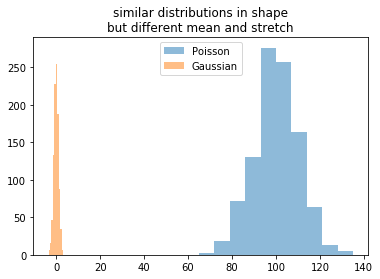

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547573322, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussianbut I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


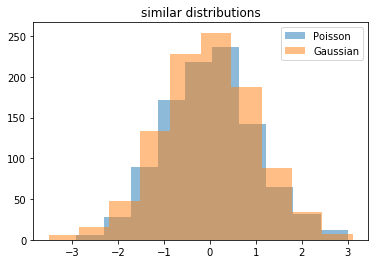

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: lower p-value but still rejecting the H0 at alpha=0.05
AD: statistics AD=0.92 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784 0.784


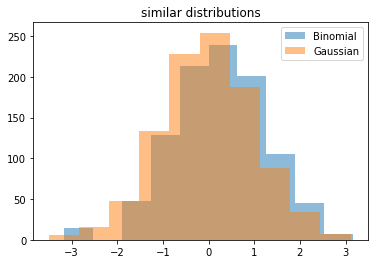

binomial vs normal KstestResult(statistic=0.14200000000000002, pvalue=0.0)
binomial vs normal AndersonResult(statistic=15.852273853456609, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
 what does the result of each test say??


In [13]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 


dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: lower p-value but still rejecting the H0 at alpha=0.05") 
print ("AD: statistics AD=0.92 larger than threshold (for alpha=0.05) ") 

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = 0.784", threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))
print (" what does the result of each test say??")

#### KS: at alpha = 0.05, pvalue <0.05: H0 that sample comes from a Gaussian distribution can be rejected
#### AD: at alpha = 0.05 the statistics = 15.85 is larger than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 can be rejected.
#### We are 95% confident that the sample does not come from a Gaussian distribtion

## 2. KL DIVERGENCE

In [14]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest

In [15]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_p)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.0690986635223


#### KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. It increases as the distributions diverge.
#### Null hypothesis: Poisson/binomial distribution are good alternative distributions to a normal distribution. 
#### The result shows that, poisson's entropy is similar as the one of normal distribution so it's a good alternative distributions. On the other hand, Binomial has a higher entropy, so that a binomial distribution is not as good as poisson to be used as a substite of Gaussian distribution.

## 3. BINOMIAL - INSTRUCTIONS for assignment

In [18]:
narray = np.linspace(1,500,100)
narray

array([   1.        ,    6.04040404,   11.08080808,   16.12121212,
         21.16161616,   26.2020202 ,   31.24242424,   36.28282828,
         41.32323232,   46.36363636,   51.4040404 ,   56.44444444,
         61.48484848,   66.52525253,   71.56565657,   76.60606061,
         81.64646465,   86.68686869,   91.72727273,   96.76767677,
        101.80808081,  106.84848485,  111.88888889,  116.92929293,
        121.96969697,  127.01010101,  132.05050505,  137.09090909,
        142.13131313,  147.17171717,  152.21212121,  157.25252525,
        162.29292929,  167.33333333,  172.37373737,  177.41414141,
        182.45454545,  187.49494949,  192.53535354,  197.57575758,
        202.61616162,  207.65656566,  212.6969697 ,  217.73737374,
        222.77777778,  227.81818182,  232.85858586,  237.8989899 ,
        242.93939394,  247.97979798,  253.02020202,  258.06060606,
        263.1010101 ,  268.14141414,  273.18181818,  278.22222222,
        283.26262626,  288.3030303 ,  293.34343434,  298.38383

In [41]:
ks_s_b = np.zeros(100)
ks_p_b = np.zeros(100)
ad_b = np.zeros(100)
kl_b = np.zeros(100)
pearson_s = np.zeros(100)
pearson_p = np.zeros(100)

In [62]:
np.random.seed(999)

#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))
    ##https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chisquare.html
    pearson_s[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))[0]
    pearson_p[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))[1]

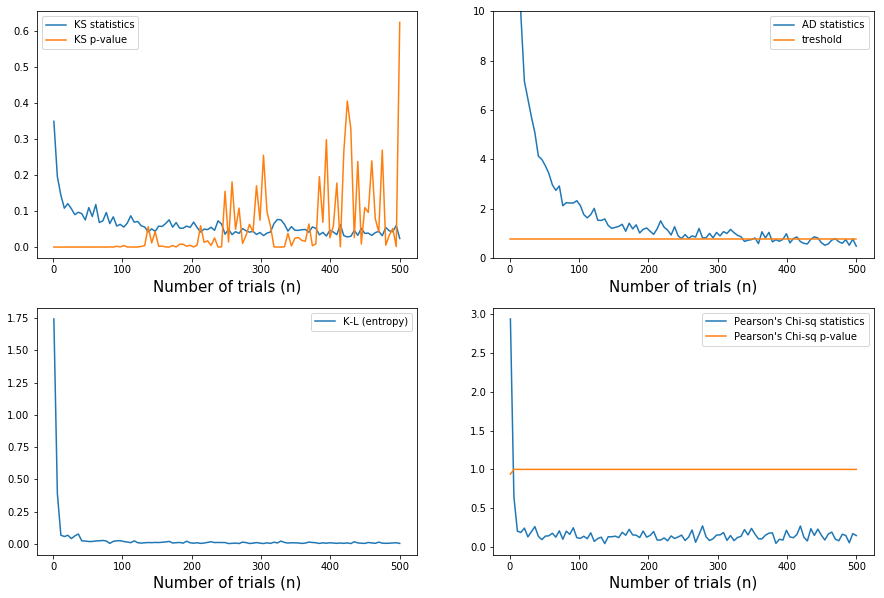

In [63]:
fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.xlabel('Number of trials (n)', fontsize = 15)
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.xlabel('Number of trials (n)', fontsize = 15)
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.xlabel('Number of trials (n)', fontsize = 15)
pl.legend()

fig.add_subplot(224)
pl.plot(narray, pearson_s, label="Pearson's Chi-sq statistics")
pl.plot(narray, pearson_p, label="Pearson's Chi-sq p-value")
pl.xlabel('Number of trials (n)', fontsize = 15)
pl.legend()

#### Goodness-of-fit tests between a Binomial distribution and a Gaussian distribution by changing the value of n using:¶
1) KS

2) AD

3) KL divergence test

4) Pearson's chisq test


a. KS test:

    Null Hypothesis: the binomial distribution is the same as the normal distribution
    
    Result: The higher the n, the low chance to reject the Null Hypothesis. 
    
    
b. AD test:
    
    Null Hypothesis: the binomial distribution is the same as the normal distribution
    Result: As n grows, it becomes harder to reject the Null Hypothesis


c. KL Divergence:

    Null Hypothesis: the binomial distribution is the same as the normal distribution
    Result: As n is above zero, binomial distribution becomes a good substitute of normal distribution


d. Pearson's Chi-square test:

    Null Hypothesis: the binomial distribution is the same as the normal distribution
    Result: As n grows, it becomes harder to reject the Null Hypothesis

## 4. POISSON - repeat the exercise for the Poisson distribution increasing the lambda parameter of the distribution

In [68]:
narray2 = np.linspace(1,500,100)
ks_s_b = np.zeros(100)
ks_p_b = np.zeros(100)
ad_b = np.zeros(100)
kl_b = np.zeros(100)
pearson_s = np.zeros(100)
pearson_p = np.zeros(100)

In [69]:
np.random.seed(999)

#loop over the different values of n (or n and p)
for i,lamda in enumerate(narray):
    p = 0.5 #parameter for the poisson, my arbitrary choice
    #generate the distribution
    dist = (np.random.poisson(lamda, 1000) - lamda ) / np.sqrt(lamda) #std of poisson distribution
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))
    ##https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chisquare.html
    pearson_s[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))[0]
    pearson_p[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))[1]

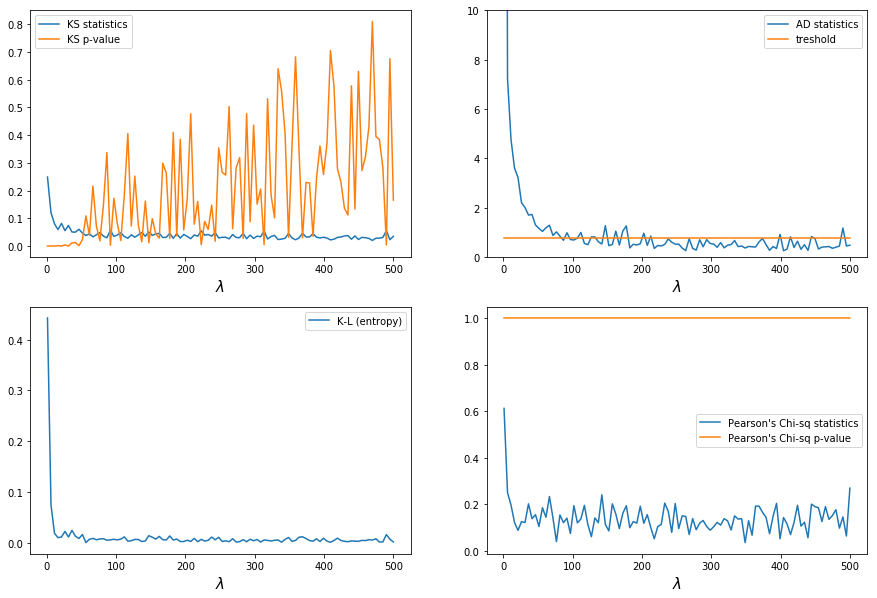

In [73]:
fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.xlabel('$\lambda$', fontsize = 15)
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.xlabel('$\lambda$', fontsize = 15)
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.xlabel('$\lambda$', fontsize = 15)
pl.legend()

fig.add_subplot(224)
pl.plot(narray, pearson_s, label="Pearson's Chi-sq statistics")
pl.plot(narray, pearson_p, label="Pearson's Chi-sq p-value")
pl.xlabel('$\lambda$', fontsize = 15)
pl.legend()

#### Goodness-of-fit tests between a Poisson distribution and a Gaussian distribution by changing the value of n using:¶
1) KS

2) AD

3) KL divergence test

4) Pearson's chisq test


a. KS test:

    Null Hypothesis: the Poisson distribution is the same as the normal distribution
    
    Result: The higher the n, the low chance to reject the Null Hypothesis. 
    
    
b. AD test:
    
    Null Hypothesis: the Poisson distribution is the same as the normal distribution
    Result: As n grows, it becomes harder to reject the Null Hypothesis


c. KL Divergence:

    Null Hypothesis: the Poisson distribution is the same as the normal distribution
    Result: As n is above zero, binomial distribution becomes a good substitute of normal distribution


d. Pearson's Chi-square test:

    Null Hypothesis: the Poisson distribution is the same as the normal distribution
    Result: As n grows, it becomes harder to reject the Null Hypothesis

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


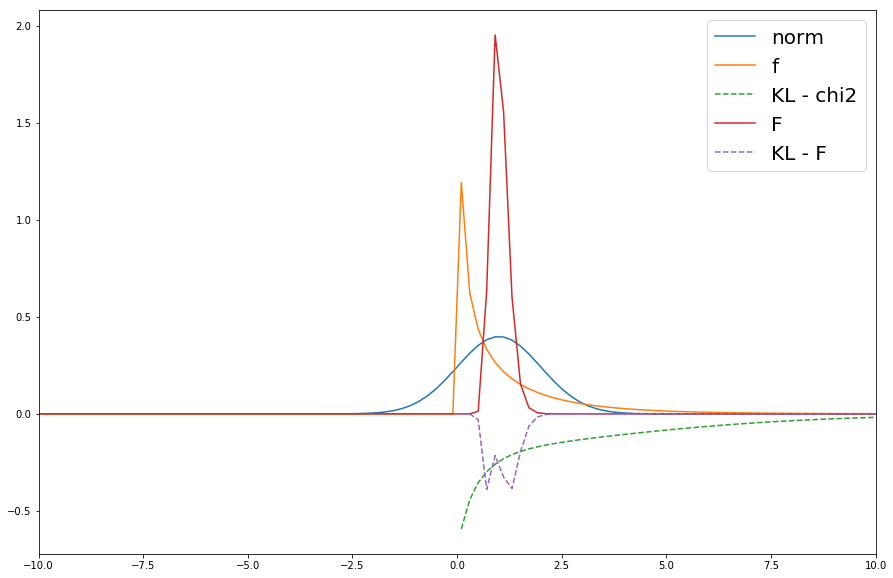

In [66]:
pl.figure(figsize=(15,10))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);